# TITANIC DATA SET EDA AND VISUALIZATION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
titanic = pd.read_csv('F:\\4th semeter\\AILAB\\titanic\\Titanic-Dataset.csv')

# COUNT GRAPH TO SHOW SURVIVAL DIFFERENCE

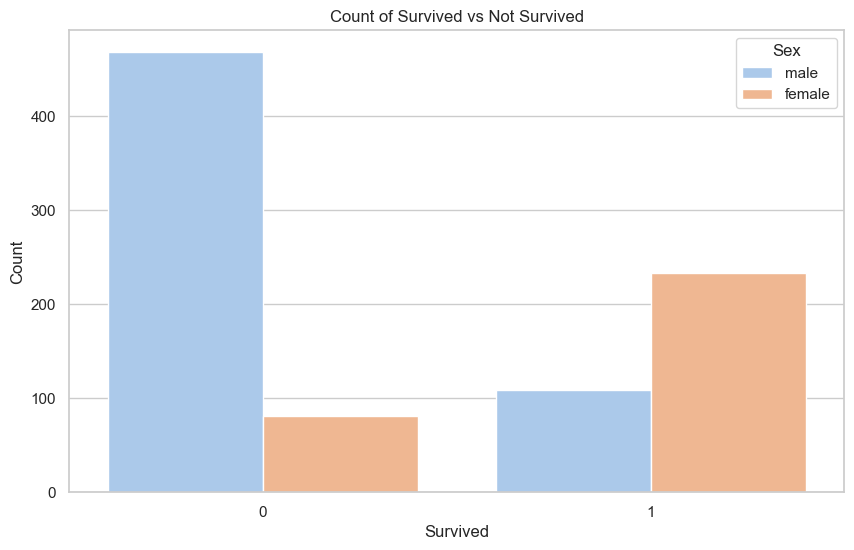

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic, palette='pastel', hue = 'Sex')
plt.title('Count of Survived vs Not Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

The above graphs provides following data
1. Majority of survivors were female
2. more than 400 male died as compared to less than 100 female

# Histogram to show the distribution of age of passangers on Titanic

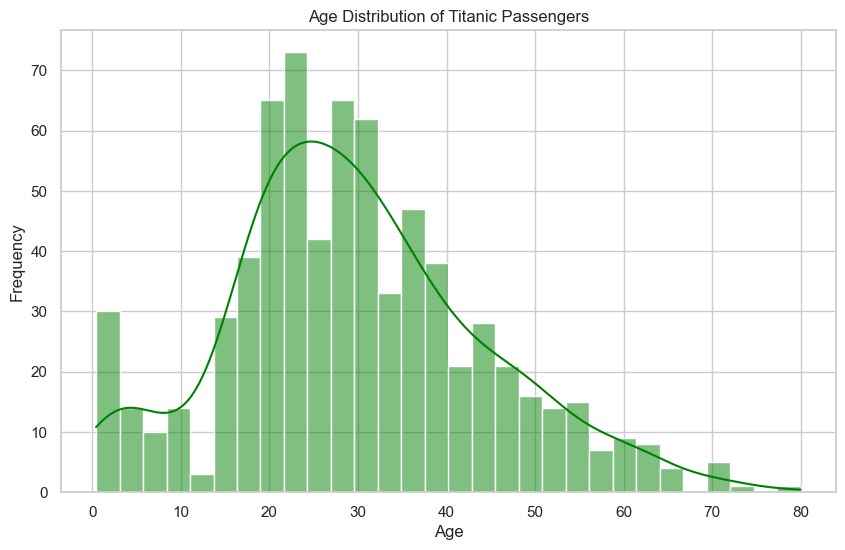

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#graph shoes that majority of passangers were from age group 20 to 40

# Box plot for passangers class by age

C:\Users\Hafeez\AppData\Local\Temp\ipykernel_7572\3049038291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic, palette="pastel")


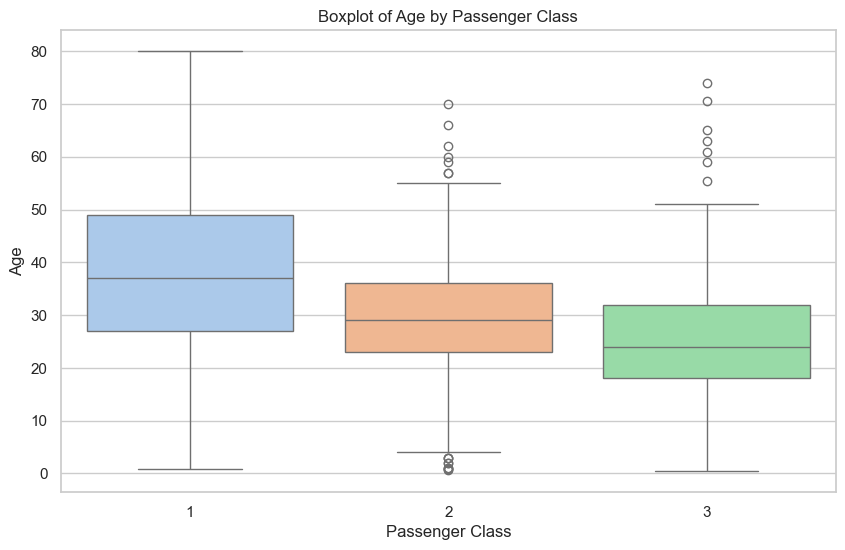

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette="pastel")
plt.title('Boxplot of Age by Passenger Class')  
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

The graph shows that majority of passangers were from passanger class 1 
and they were from age group 30-40 
which according to the previous graph is the most age group of passangers of died

# Scatter plot for age vs fare 

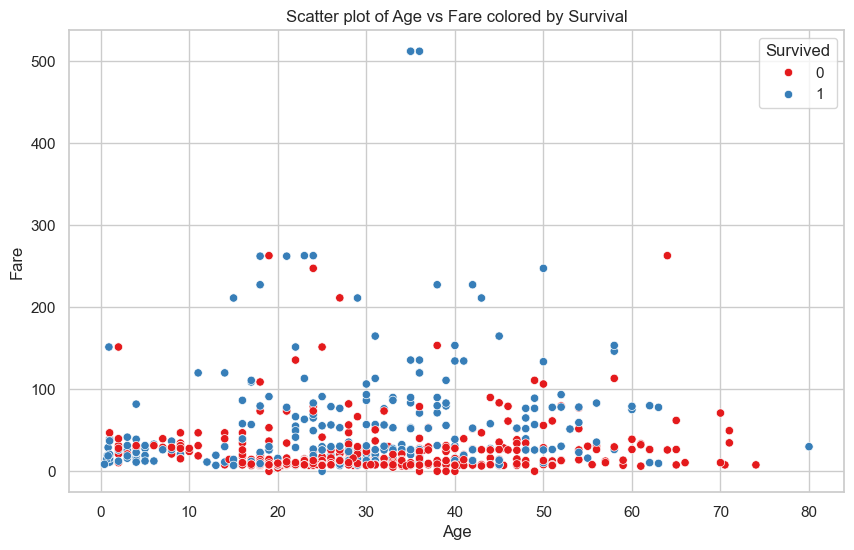

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic, palette='Set1')
plt.title('Scatter plot of Age vs Fare colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


This shows that mostly people who died were those who gave the least fare

# CORRELATION HEATMAP FOR SURVIVALS

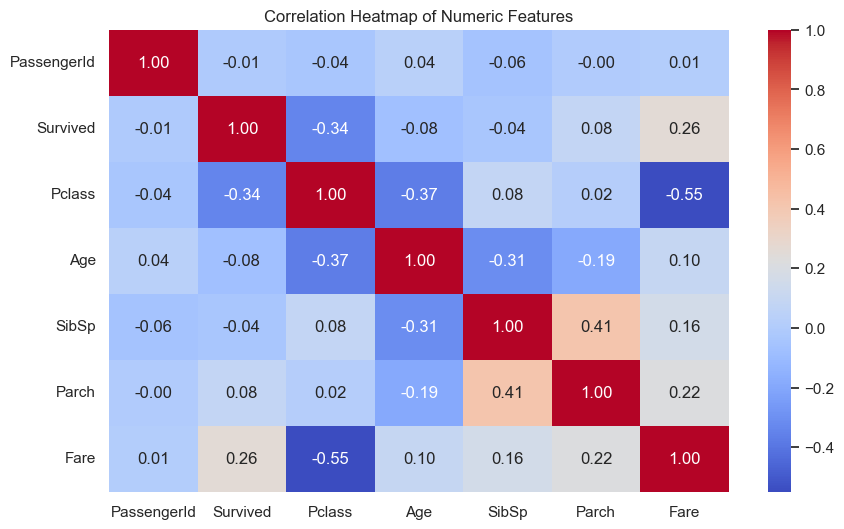

In [20]:
numeric_df = titanic.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# PERFORMING DATA PREPROCESSING

In [30]:
#cleaning data and dropping missing rows
titanic.dropna(inplace=True)
label_encoder = LabelEncoder()
for column in titanic.select_dtypes(include=['object']).columns:
    titanic[column] = label_encoder.fit_transform(titanic[column])
# splitting the datasset into features ad target
features = titanic.drop(columns=['Survived'])
target = titanic['Survived']
X = titanic[features.columns]
Y = titanic[target.name]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#printing the shape of the train and test
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (146, 10)
X_test: (37, 10)
y_train: (146,)
y_test: (37,)


### Above code drops any table having missing columns and the label encoder converts all non-numeric data to numeric data
### features are to be tested against survived providing X and Y 

# Perform Model Training 

In [36]:
# store all classification models in a dictionary
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron()
}
print("Classification Models (Accuracy):")
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc = acc*100
    print(f"{name}: {acc:.4f}")
# Store the accuracy of regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "SVM Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}

print("\nRegression Models (MSE):")
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse = mse*100
    print(f"{name}: {mse:.4f}")


Classification Models (Accuracy):
Logistic Regression: 72.9730
SVM Classifier: 62.1622
Decision Tree Classifier: 67.5676
Random Forest Classifier: 67.5676
KNN Classifier: 70.2703
Naive Bayes: 72.9730
Perceptron: 37.8378

Regression Models (MSE):
Linear Regression: 16.4803
SVM Regressor: 29.4988
Decision Tree Regressor: 29.7297
Random Forest Regressor: 19.5741
KNN Regressor: 23.8919


# RESULT
The above accuracy results shows that Logistic regression works best for classfification 